In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib.pyplot是一些命令行风格函数的集合，使matplotlib以类似于MATLAB的方式工作。
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="deep")

In [2]:
A=np.eye(5)    #单位对角矩阵
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [3]:
df = pd.read_csv('ex1data1.txt',names=['人口','利润'])    # header = None表示没有表头
#需要注意的是，Jupyter notebook只能打开当前目录下的数据集，如csv，所以需要使用upload把数据集倒导入到当前目录下。           
#pd.read_csv的作用是将csv文件读入并转化为数据框形式，有非常多的参数，用到时可查阅文档。

In [4]:
df.head() #读前5行
#括号内可填写要读取的前n行，如果不填，默认为n=5

,人口,利润
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.info() #查看索引、数据类型和内存信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   人口      97 non-null     float64
 1   利润      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 

<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gabe/miniconda3/envs/

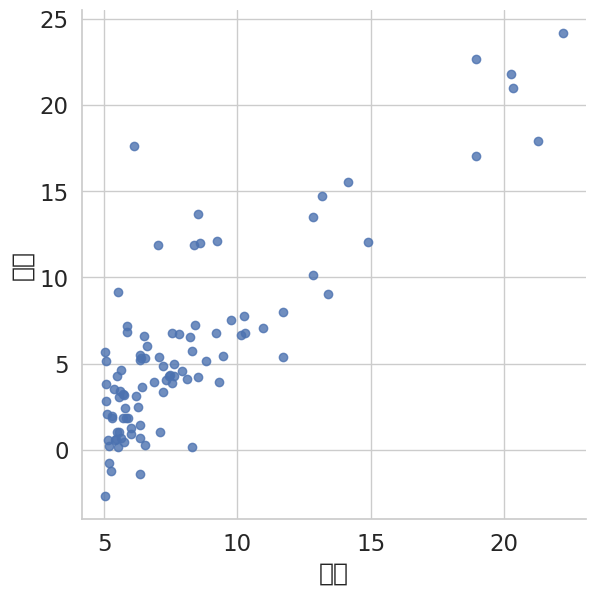

In [6]:
fig=plt.figure()

sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

sns.lmplot('人口','利润',data=df,size=6,fit_reg = False)
#fit_reg:拟合回归参数,如果fit_reg=True则散点图中则出现拟合直线
plt.show()

In [7]:
#Define Function
def computeCost (X,y,theta):
    inner=np.power((X*theta.T)-y,2)  
    #theta.T就是矩阵theta的转置矩阵
    #np.power(A,B)   ## 对A中的每个元素求B次方
    return np.sum(inner)/(2*len(X))

In [8]:
df.insert(0,'ONE',1)  #在第0列插入表头为“ONE”的列，数值为1

In [9]:
df

,ONE,人口,利润
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [10]:
#设置训练值变量X和目标变量y
cols=df.shape[1] #获取表格df的列数
X=df.iloc[:,0:cols-1] #除最后一列外，取其他列的所有行，即X为O和人口组成的列表
y=df.iloc[:,cols-1:cols]#取最后一列的所有行，即y为利润

In [11]:
df #does not change

,ONE,人口,利润
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [12]:
X.head()#看X的前5行

,ONE,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
y.head()#看y的前5行

,利润
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [14]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [15]:
theta

matrix([[0, 0]])

In [16]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [17]:
#Feed the data into the defined function
computeCost(X,y,theta)

32.072733877455676

In [18]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [19]:
# batch gradient decent（批量梯度下降)
def gradientDescent(X,y,theta,alpha,iters):      #alpha是学习率,iters为迭代次数
    temp=np.matrix(np.zeros(theta.shape)) #np.zeros(theta.shape)=[0.,0.],然后将temp变为矩阵[0.,0.]
    parameters= int(theta.ravel().shape[1])  
    #theta.ravel()：将多维数组theta降为一维，.shape[1]是统计这个一维数组有多少个元
    #parameters表示参数
    cost=np.zeros(iters)     #初始化代价函数值为0数组，元素个数为迭代次数
    
    for i in range(iters):   #循环iters次
        error=(X*theta.T)-y
        
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])  #将误差与训练数据相乘，term为偏导数
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #更新theta
        
        
        theta=temp
        cost[i] = computeCost(X,y,theta)  #计算每一次的代价函数
           
    return theta,cost


In [20]:
alpha=0.01
iters=1500

In [21]:
g, cost = gradientDescent(X, y, theta, alpha, iters) #令g和cost分别等于函数的两个返回值

In [22]:
g

matrix([[-3.63029144,  1.16636235]])

In [23]:
cost

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

In [24]:
computeCost(X, y, g)  #最小化的低价函数

4.483388256587726

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

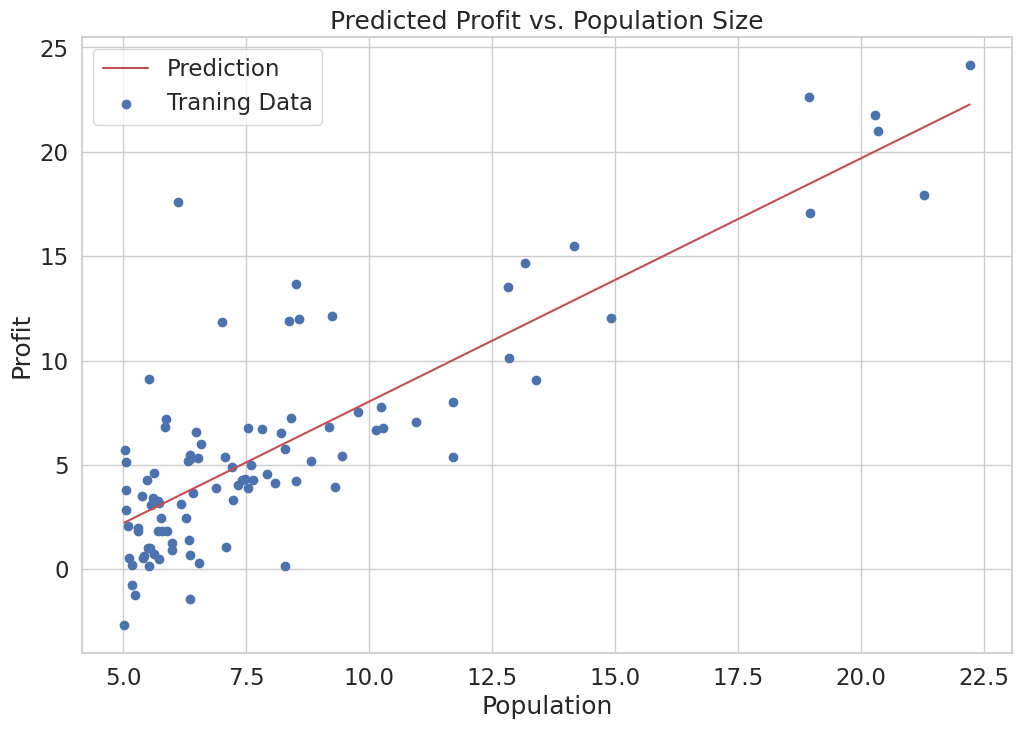

In [25]:
x = np.linspace(df.人口.min(),df.人口.max(),100)#以人口最小值为起点，最大值为终点，创建元素个数为100的等差数列
f = g[0,0] + (g[0,1] * x) #f是假设函数H

fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(x, f, 'r', label='Prediction')   #设置点的横坐标，纵坐标，用红色线，并且设置Prediction为关键字参数
ax.scatter(df.人口, df.利润, label='Traning Data')  #以人口为横坐标，利润为纵坐标并且设置Traning Data为关键字参数
ax.legend(loc=2)  #legend为显示图例函数，loc为设置图例显示的位置，loc=2即在左上方
ax.set_xlabel('Population')  #设置x轴变量
ax.set_ylabel('Profit')  #设置x轴变量
ax.set_title('Predicted Profit vs. Population Size') #设置表头
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

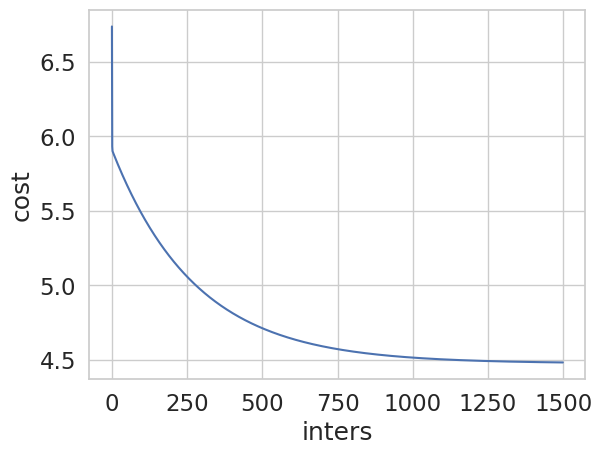

In [26]:
ax=sns.lineplot(data=cost,err_style='band',ci=[10,50,90],n_boot=iters)  #函数参数解释见笔记
ax.set_xlabel("inters")
ax.set_ylabel("cost")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

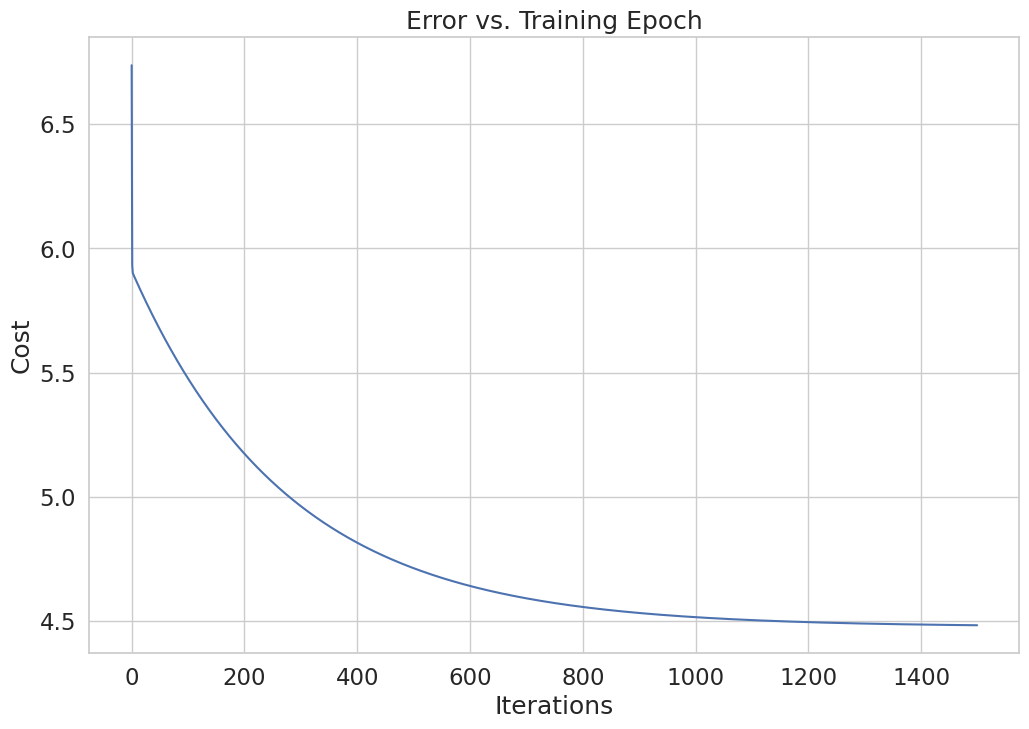

In [27]:
#让我们换一种画图的方法
fig, ax = plt.subplots(figsize=(12,8)) #以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(np.arange(iters), cost, 'b') #作图:以迭代次数为x，代价函数值为y,线条颜色为红色
ax.set_xlabel('Iterations')  #设置x轴变量
ax.set_ylabel('Cost')  #设置y轴变量
ax.set_title('Error vs. Training Epoch') #设置表头
plt.show()

In [28]:
data2= pd.read_csv('ex1data2.txt',names=['square','bedrooms','price']) 
data2.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [29]:
#减去均值，除以标准差，进行特征缩放，一般可称为特征标准化
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [30]:
# add ones column
data2.insert(0, 'Ones', 1)#在第0列插入表头为“ONE”的列，数值为1

# set X (training data) and y (target variable)
cols = data2.shape[1]  #获取表格df的列数
X2 = data2.iloc[:,0:cols-1]#除最后一列外，取其他列的所有行，即X2为O，面积，卧室数组成的列表
y2 = data2.iloc[:,cols-1:cols]#取最后一列的所有行，即y2为利润

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  #转换为矩阵
y2 = np.matrix(y2.values)  #转换为矩阵
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)   #计算代价函数

0.130686706060959

In [31]:
1

1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

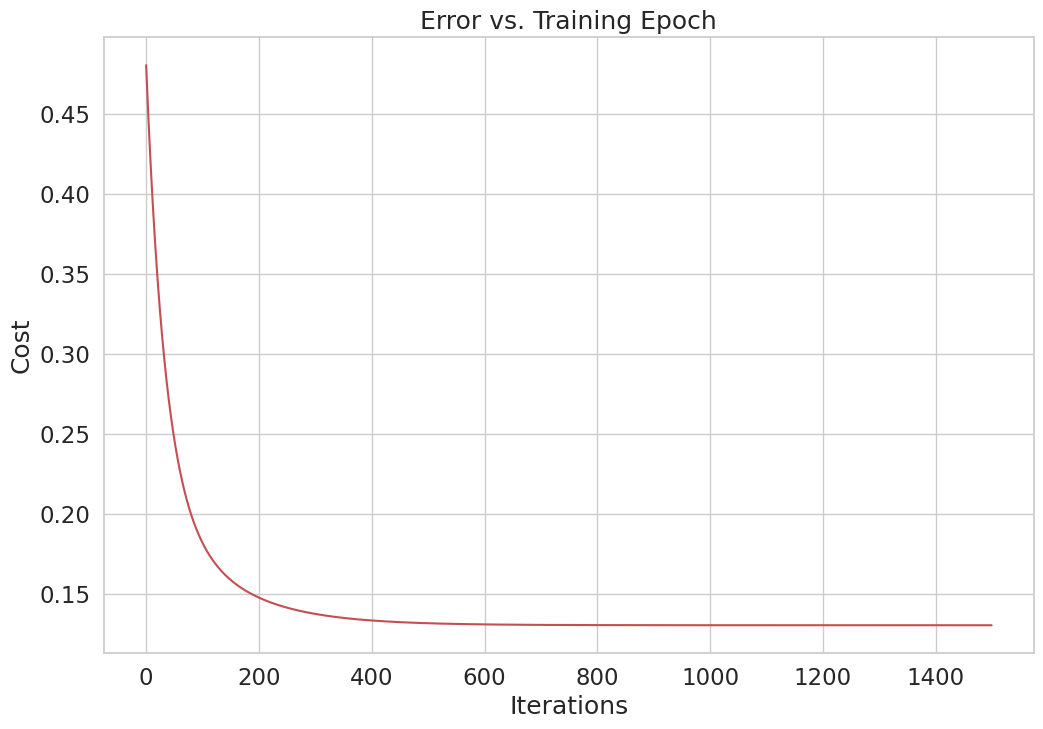

In [32]:
fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [33]:
data2.mean()

Ones        1.000000e+00
square      3.779483e-17
bedrooms    2.746030e-16
price      -9.684924e-17
dtype: float64

In [34]:
data2.mean()['square']

3.7794826370218094e-17

In [35]:
data2.mean()['bedrooms']

2.7460303534611584e-16

In [36]:
(1300-data2.mean()['square'])/(data2.std()['square'])

1299.9999999999998

In [37]:
#错误示范！停！

In [38]:
data2= pd.read_csv('ex1data2.txt',names=['square','bedrooms','price']) 
mu=data2.mean()
std=data2.std()
pred_sq=(1300-mu['square'])/std['square']
print(pred_sq)

-0.8816896639956278


In [39]:
pred_bed=(2-mu['bedrooms'])/std['bedrooms']
print(pred_bed)

-1.537766911784067


In [40]:
np.array([1,pred_sq,pred_bed]).reshape(1,3)*g2.T

matrix([[-0.69878716]])

In [41]:
#What? Negative price???

In [42]:
#别着急，这是标准化后的数值，我们现在将他投影回价格空间
np.array([1,pred_sq,pred_bed]).reshape(1,3)*g2.T*std['price']+mu['price']

matrix([[253036.38323799]])

In [43]:
#其实我们也可以Just Import It

#Just Import It
#Just Import It
#Just Import It

from sklearn import linear_model  #从sklearn库中引入线性模块 
model = linear_model.LinearRegression()  #声明对象为线性回归模型
model.fit(X, y)           #拟合X,y

/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family '

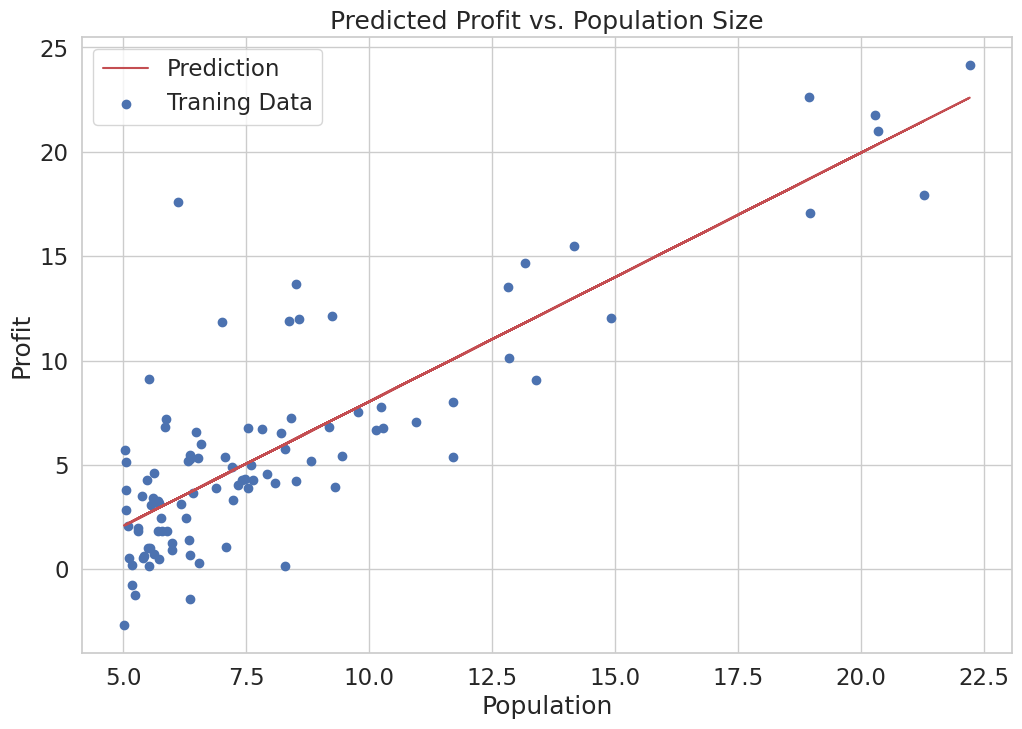

In [44]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten() #将model.predict(X)中的数据降为一维，并返回源数据的副本

fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(x, f, 'r', label='Prediction')   #设置点的横坐标，纵坐标，用红色线，并且设置Prediction为关键字参数
ax.scatter(df.人口, df.利润, label='Traning Data')  #以人口为横坐标，利润为纵坐标并且设置Traning Data为关键字参数
ax.legend(loc=2)  #legend为显示图例函数，loc为设置图例显示的位置，loc=2即在左上方
ax.set_xlabel('Population')  #设置x轴变量
ax.set_ylabel('Profit')  #设置x轴变量
ax.set_title('Predicted Profit vs. Population Size') #设置表头
plt.show()

In [45]:
base = np.logspace(-5, -1, num=4)  #以10的-5次方为起点，10的-5次方为终点，元素数目为4的等比数列
candidate = np.sort(np.concatenate((base, base*3))) #将base和base*3两个数组拼接在一起，并将其排序
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

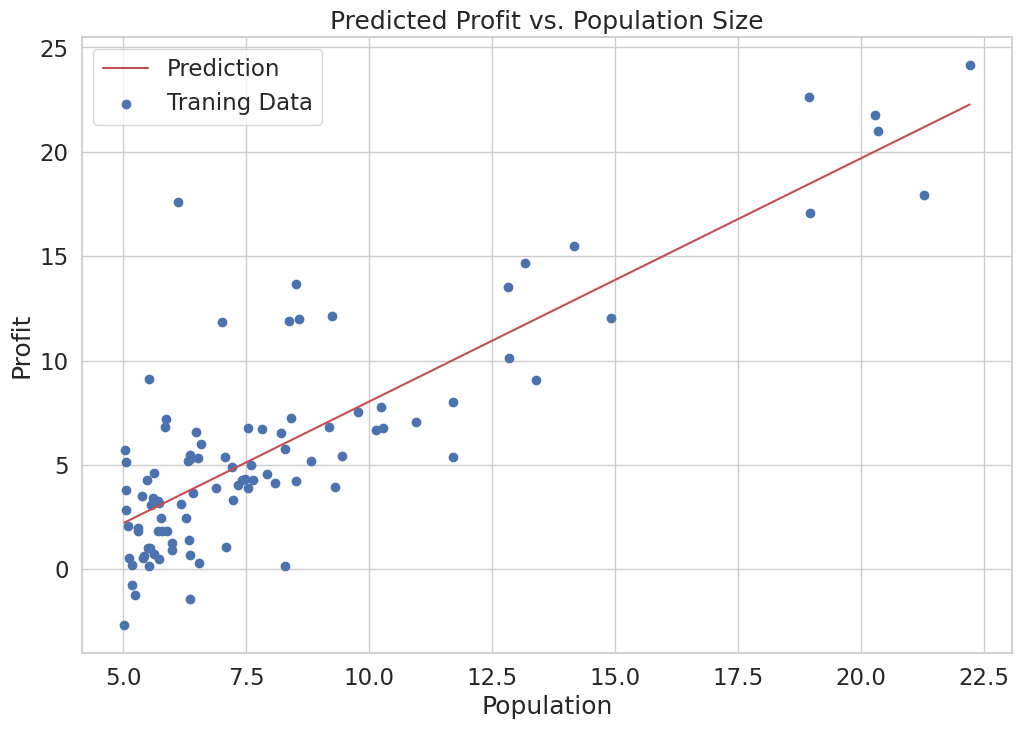

In [46]:
x = np.linspace(df.人口.min(),df.人口.max(),100)#以人口最小值为起点，最大值为终点，创建元素个数为100的等差数列
f = g[0,0] + (g[0,1] * x) #f是假设函数H

fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(x, f, 'r', label='Prediction')   #设置点的横坐标，纵坐标，用红色线，并且设置Prediction为关键字参数
ax.scatter(df.人口, df.利润, label='Traning Data')  #以人口为横坐标，利润为纵坐标并且设置Traning Data为关键字参数
ax.legend(loc=2)  #legend为显示图例函数，loc为设置图例显示的位置，loc=2即在左上方
ax.set_xlabel('Population')  #设置x轴变量
ax.set_ylabel('Profit')  #设置x轴变量
ax.set_title('Predicted Profit vs. Population Size') #设置表头
plt.show()

In [47]:
inner=np.power(model.predict(X).flatten()-df.利润.values,2)  
np.sum(inner)/(2*len(X)) 

/Users/gabe/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


4.476971375975178

In [48]:
computeCost(X, y, g)  #最小化的低价函数

4.483388256587726

In [49]:
#Just Import It

In [50]:
###

In [51]:
###

In [52]:
###